# Laboratorio 3 - Regresión Lineal
### Autor: Javier Mombiela
### Fecha: 07-03-2023

In [1]:
#importacion de paquetes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# definiendo funcion de regresion linear
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t, costs


In [3]:
# definiendo funciones de costo y gradiante
cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

## Task 1.1

In [4]:
# Se lee el archivo CSV en el array 'data' el cual ahora puede ser utilizado para realizar operacaciones y analisis de datos.
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=1)

## Task 1.2

In [5]:
# Obtenemos la informacion del dataset

# Obtenemos el dataset size
dataSize = data.shape[0]  # numero de filas

# Dividimos los datos en variables independientes (X) y dependientes (y)
X = data[:, 5]  # seleccionar la columna de sqft_living como variable independiente
y = data[:, 2]  # seleccionar la columna de price como variable dependiente

# Reorganizamos los datos para que tengan la forma de matriz adecuada para la regresion lineal polinomial
X = X.reshape(-1, 1)  # convertir X en una matriz de una columna
y = y.reshape(-1, 1)  # convertir y en una matriz de una columna

# Agregamos columna de ones a X para agregar el bias
Xr = np.hstack((np.ones_like(X), X))

In [6]:
# Realizamos la regresion lineal 

# Definimos el t inicial como un valor random
to = np.random.rand(Xr.shape[1], 1)

# Realizamos la regresion lineal
tf, costs = linreg(Xr,y,to,cost,grad,a=0.00000002,n=50)

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym 
ym = xmr @ tf

(2, 1) (2, 1)


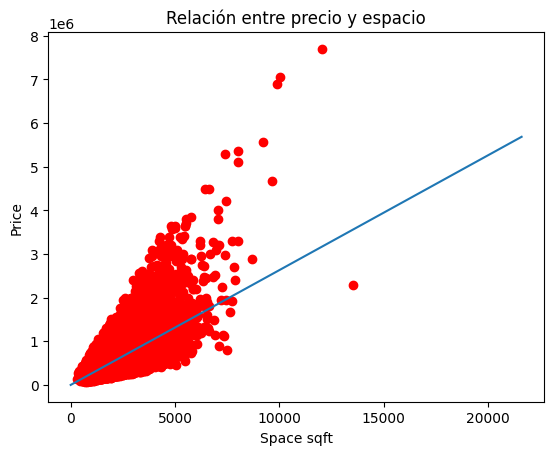

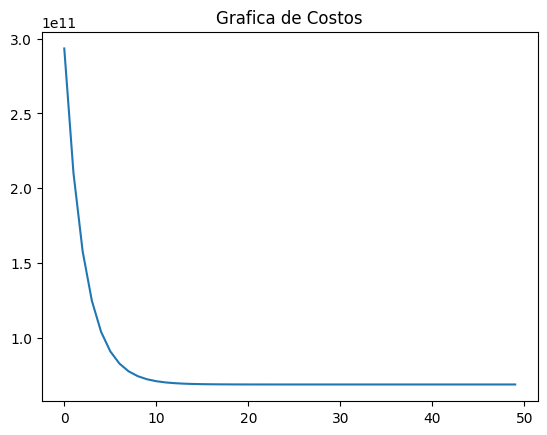

In [7]:
# Graficamos los resultados

plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Space sqft')
plt.ylabel('Price')
plt.show()

plt.plot(costs)
plt.title("Grafica de Costos")
plt.show()

## Task 1.4

In [8]:
# 1. hacer shuffle de X
# 2. agarrar primer 40%, training
# 3. segundo 40%, cross validation

#si training tiene variance sobre cross validation, entonces hay overfitting y hay que reducir el numero de features
#si training tiene bias sobre cross validation, entonces hay underfitting y hay que agregar mas features

# 4. tercer 20%, testing

In [ ]:
X.random.shuffle(X)